<a href="https://colab.research.google.com/github/cuongle2002/BTVNW5-FUZZYLOGIC-/blob/main/Intelligent_size_matching_recommender_system_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 23.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=da3e2c00b16368c57f7d6e64905674454edbc7e3bb3019b5731e3a6d807d3f3e
  Stored in directory: /root/.cache/pip/wheels/32/2c/a1/a90a7d7dd8448ec029f298a61f3490275e99b17aa348be675c
Successfully built scikit-fuzzy


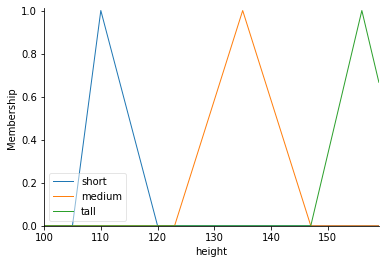

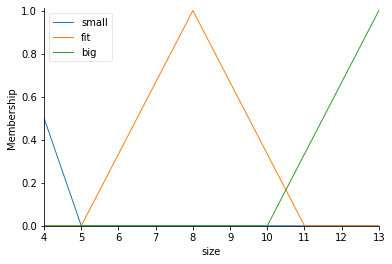

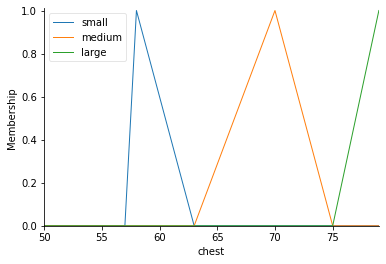

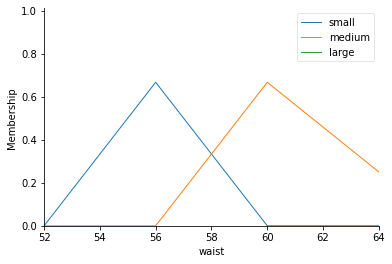

In [2]:
import numpy as np
import skfuzzy as fuzz 
import matplotlib.pyplot as plt
from skfuzzy import control as ctrl

height = ctrl.Antecedent(np.arange(100, 160, 1), 'height')
chest = ctrl.Antecedent(np.arange(50, 80, 1), 'chest')
waist = ctrl.Antecedent(np.arange(52, 65, 4), 'waist')
size = ctrl.Consequent(np.arange(4, 14 , 1), 'size')

size['small'] = fuzz.trimf(size.universe, [2, 3, 5])
size['fit'] = fuzz.trimf(size.universe, [5, 8, 11])
size['big'] = fuzz.trimf(size.universe, [10, 13, 14])

height['short'] = fuzz.trimf(height.universe, [105, 110, 120])
height['medium'] = fuzz.trimf(height.universe, [123, 135, 147])
height['tall'] = fuzz.trimf(height.universe, [147, 156,165])

chest['small'] = fuzz.trimf(chest.universe, [58, 58, 63])
chest['medium'] = fuzz.trimf(chest.universe, [63, 70, 75])
chest['large'] = fuzz.trimf(chest.universe, [75, 79, 83])


waist['small'] = fuzz.trimf(waist.universe, [55, 55, 58])
waist['medium'] = fuzz.trimf(waist.universe, [58, 61, 65])
waist['large'] = fuzz.trimf(waist.universe, [65, 66, 68])


height.view()
size.view()
chest.view()
waist.view()

8.0


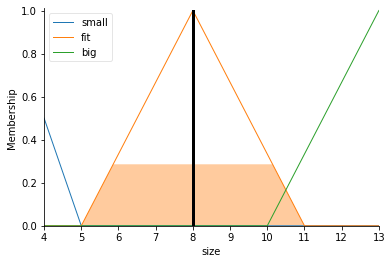

In [3]:
rule1 = ctrl.Rule(height['short'] & chest['small'] & waist['small'], size['small'])
rule2 = ctrl.Rule(height['short'] & chest['small'] & waist['medium'], size['small'])
rule3 = ctrl.Rule(height['short'] & chest['small'] & waist['large'], size['fit'])
rule4 = ctrl.Rule(height['short'] & chest['medium'] & waist['small'], size['small'])
rule5 = ctrl.Rule(height['short'] & chest['medium'] & waist['medium'], size['fit'])
rule6 = ctrl.Rule(height['short'] & chest['medium'] & waist['large'], size['fit'])
rule7 = ctrl.Rule(height['short'] & chest['large'] & waist['small'], size['fit'])
rule8 = ctrl.Rule(height['short'] & chest['large'] & waist['medium'], size['fit'])
rule9 = ctrl.Rule(height['short'] & chest['large'] & waist['large'], size['fit'])
rule10 = ctrl.Rule(height['medium'] & chest['small'] & waist['small'], size['small'])
rule11 = ctrl.Rule(height['medium'] & chest['small'] & waist['medium'], size['fit'])
rule12 = ctrl.Rule(height['medium'] & chest['small'] & waist['large'], size['fit'])
rule13 = ctrl.Rule(height['medium'] & chest['medium'] & waist['small'], size['fit'])
rule14 = ctrl.Rule(height['medium'] & chest['medium'] & waist['medium'], size['fit'])
rule15 = ctrl.Rule(height['medium'] & chest['medium'] & waist['large'], size['big'])
rule16 = ctrl.Rule(height['medium'] & chest['large'] & waist['small'], size['fit'])
rule17 = ctrl.Rule(height['medium'] & chest['large'] & waist['medium'], size['big'])
rule18 = ctrl.Rule(height['medium'] & chest['large'] & waist['large'], size['big'])
rule19 = ctrl.Rule(height['tall'] & chest['small'] & waist['small'], size['small'])
rule20 = ctrl.Rule(height['tall'] & chest['small'] & waist['medium'], size['small'])
rule21 = ctrl.Rule(height['tall'] & chest['small'] & waist['large'], size['fit'])
rule22 = ctrl.Rule(height['tall'] & chest['medium'] & waist['small'], size['fit'])
rule23 = ctrl.Rule(height['tall'] & chest['medium'] & waist['medium'], size['fit'])
rule24 = ctrl.Rule(height['tall'] & chest['medium'] & waist['large'], size['big'])
rule25 = ctrl.Rule(height['tall'] & chest['large'] & waist['small'], size['fit'])
rule26 = ctrl.Rule(height['tall'] & chest['large'] & waist['medium'], size['big'])
rule27 = ctrl.Rule(height['tall'] & chest['large'] & waist['large'], size['big'])

size_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rul e8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule9,rule20,rule21,rule22,rule23,rule24,rule25,rule26,rule27])
sizing= ctrl.ControlSystemSimulation(size_ctrl)
sizing.input['height'] = 150
sizing.input['chest'] = 65
sizing.input['waist'] = 60

sizing.compute()
print(sizing.output['size'])
size.view(sim=sizing)